## Rainfall Prediction in Australian Areas
* Data set and extraction 
  * Dataset is taken from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/version/2#weatherAUS.csv 
  * Data extraction is by downloading and reading the excel file. 
* Data cleanup and organizing existing data
  * Column Dropped #These columns are not used as I have derived new columns using these.
      * 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
      * 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm'
  * Column Added 
      * Cloud, Pressure, Humidity, WindSpeed  
  * All the null values 'NaN' is replaced by zeros as for these fields known values can be replaced by the zero for calculations  
* For Data visualization
  * The critical dimensions(columns) of the data are Rainfall, Humidity, Evaporation, Pressure, Sunshine 
      * Checking the total rainfall yearly and then for the year with maximum rainfall we can see that the state with maxmium rainfall is Cairns.
      * The correlation of rainfall with Evaporation, Humidity and WindSpeed has been plotted.
  * The  critical dimensions(columns) 
* Predictive statistics
  * Target - It will Rain Tomorrow? Yes or No
  * Linear regression is done where we can see Evaporation is '0.101773' so it is negitively correlated with the Rainfall 
## Conclusion
#### The rainfall is dependent on the various factors like Evaporation, Humidity, Pressure, Wind and Temperature. And after performing the regression statistics model we can say that rainfall in negatively correlated with Evaporation and Humidity but positively correlated with Windspeed.      

In [183]:
#Importing libararies and Reading excel file
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
file = pd.read_excel('weatherAUS downloaded.xlsx')

In [184]:
#Printing the top 5 Row of the imported dataset
file.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [185]:
#Following are the headers of the 
print(file.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [179]:
file.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RISK_MM                 float64
RainTomorrow             object
dtype: object

In [188]:
#file.rename(columns={"Humidity3pm": "Humidity"})
file["Pressure"]= (file["Pressure3pm"] + file["Pressure9am"])/2
file["Cloud"]= (file["Cloud9am"] + file["Cloud3pm"])/2
file["Humidity"]= (file["Humidity3pm"] + file["Humidity9am"])/2
file["WindSpeed"]= (file["WindSpeed9am"] + file["WindSpeed3pm"])/2

file.drop(columns={'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
'Temp3pm'}, inplace=True) 

In [204]:
file.fillna(0, inplace=True)
file.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RISK_MM,RainTomorrow,Pressure,Cloud,Humidity,WindSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,0.0,No,0.0,No,1007.40,0.0,46.5,22.0
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,0.0,No,0.0,No,1009.20,0.0,34.5,13.0
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,0.0,No,0.0,No,1008.15,0.0,34.0,22.5
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,0.0,No,1.0,No,1015.20,0.0,30.5,10.0
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,0.0,No,0.2,No,1008.40,7.5,57.5,13.5


In [206]:
file.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RISK_MM,Pressure,Cloud,Humidity,WindSpeed
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.131807,23.174186,2.326738,3.129340,3.988338,2.360682,914.919928,2.554982,58.298105,15.980639
std,6.440548,7.194768,8.426426,4.166674,4.688665,8.477969,304.864442,2.913920,20.657363,7.973465
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.500000,17.900000,0.000000,0.000000,0.000000,0.000000,1009.750000,0.000000,47.000000,10.500000
50%,12.000000,22.600000,0.000000,1.600000,0.200000,0.000000,1015.450000,1.000000,60.500000,15.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,0.800000,1020.550000,5.500000,72.500000,20.500000
max,33.900000,48.100000,371.000000,145.000000,14.500000,371.000000,1040.050000,8.000000,100.000000,83.000000


Text(0.5,1,'Total rainfall from year 2007 to 2017')

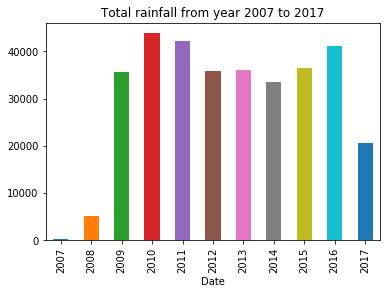

In [197]:
#file.Date.dt.year
#file.Rainfall
#file.groupby(file.Date.dt.year).apply(lambda x:x['Rainfall'].sum()).plot(kind='bar')
file.groupby(file.Date.dt.year).apply(lambda x:x['Rainfall'].sum()).plot(kind='bar')
plt.title('Total rainfall from year 2007 to 2017')

Text(0.5,1,'Top 10 Areas with Maximum Rainfall in year 2010')

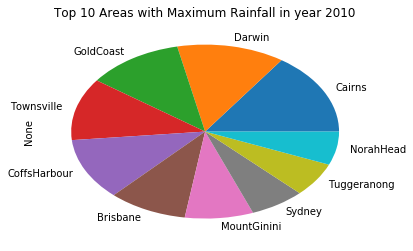

In [196]:
file[file.Date.dt.year==2010].groupby('Location').apply(lambda x:x['Rainfall'].sum()).sort_values(ascending=False)[:10].plot(kind='pie')
plt.title('Top 10 Areas with Maximum Rainfall in year 2010')

Text(0.5,1,'Correlation between Evaporation and Rainfall')

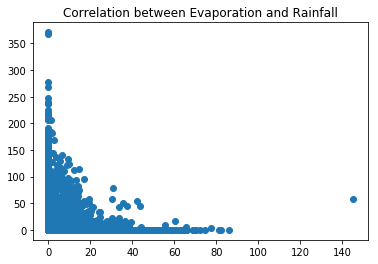

In [174]:
plt.scatter(file.Evaporation, file.Rainfall)
plt.title("Correlation between Evaporation and Rainfall")

Text(0.5,1,'Correlation between Humidity and Rainfall')

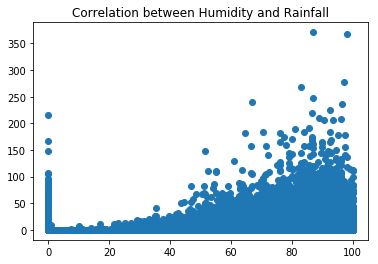

In [190]:
plt.scatter(file.Humidity, file.Rainfall)
plt.title("Correlation between Humidity and Rainfall")

Text(0.5,1,'Correlation between WindSpeed and Rainfall')

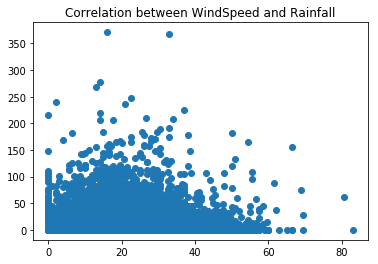

In [198]:
plt.scatter(file.WindSpeed, file.Rainfall)
plt.title("Correlation between WindSpeed and Rainfall")

In [108]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('Rainfall ~ Evaporation', data = file).fit()
print(results.params)
results.summary()

Intercept      2.601408
Evaporation   -0.101773
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     339.3
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           1.30e-75
Time:                        00:56:43   Log-Likelihood:            -2.6798e+05
No. Observations:               81093   AIC:                         5.360e+05
Df Residuals:                   81091   BIC:                         5.360e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.6014      0.038     68.317      0.000       2.527       2.676
Evaporation    -0.1018      0.006    -18.420      0.000      -0.113      -0.091
==============================================================================
Omnibus:                   106544.389   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29910933.876
Skew:                           7.345   Prob(JB):                         0.00
Kurtosis:                      95.933   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('Rainfall ~ Humidity', data = file).fit()
print(results.params)
results.summary()

Intercept   -2.780145
Humidity     0.087599
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     6875.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:33:19   Log-Likelihood:            -5.0147e+05
No. Observations:              142193   AIC:                         1.003e+06
Df Residuals:                  142191   BIC:                         1.003e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7801      0.065    -42.545      0.000      -2.908      -2.652
Humidity       0.0876      0.001     82.913      0.000       0.086       0.090
==============================================================================
Omnibus:                   224358.142   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        215516986.465
Skew:                          10.047   Prob(JB):                         0.00
Kurtosis:                     192.663   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('Rainfall ~ WindSpeed', data = file).fit()
print(results.params)
results.summary()

Intercept    1.049869
WindSpeed    0.079901
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     817.5
Date:                Tue, 11 Dec 2018   Prob (F-statistic):          2.77e-179
Time:                        16:33:48   Log-Likelihood:            -5.0442e+05
No. Observations:              142193   AIC:                         1.009e+06
Df Residuals:                  142191   BIC:                         1.009e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0499      0.050     21.036      0.000       0.952       1.148
WindSpeed      0.0799      0.003     28.591      0.000       0.074       0.085
==============================================================================
Omnibus:                   222713.678   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        198615722.497
Skew:                           9.923   Prob(JB):                         0.00
Kurtosis:                     185.015   Cond. No.                         40.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""